In [1]:
options(jupyter.rich_display = FALSE)

# Functions

* A **function** is a piece of code that takes _input arguments_ , performs a specific task, and _returns its output_.
* R has many _built-in functions_ such as `c()`, `length()`, `runif()`, `mean()`, `sum()`, etc.
* Users can also define their own functions.


A first example
=============
Let us define a function that returns the square of a given number.

In [2]:
square <- function(x) {
    return(x^2)
}

We call the function by providing the input value as an argument. The function *returns* a value, which we can store in a variable.

In [3]:
foo <- square(3)
foo

[1] 9

If we type a function's name and press Enter, we get back the definition of the function. 

In [4]:
square

function(x) {
    return(x^2)
}

General syntax of function definition
=========

    <function_name> <- function([<argument_1>, <argument_2>, ...]) {
        <statements>
        return(<return_value>)
    }
    
The `return` statement is optional. The function returns the value of the last expression in its block. So the function `square()` can also be defined as:

In [6]:
square <- function(x) {
    print(x)
    x^2
    }
sq3 <- square(3)
sq3

[1] 3


[1] 9

* The job of the braces `{}` is to combine several statements into one. 
* As we have only one statement here, braces can be omitted and the function can be stated in one line.

In [8]:
square <- function(x) x^2
square(3)

[1] 9

Function arguments
==============
A function can be defined with any number of arguments.

In [9]:
f <- function(x,y,z){
    return(x + y*z)
}

In [13]:
f(1,2,3)

[1] 7

It is possible to change the order of arguments by providing the names explicitly.

In [14]:
f(z=3,x=1,y=2)

[1] 7

You can even omit some names, and the unnamed arguments will be matched in order.

In [15]:
f(z=3,1,2)

[1] 7

Return values
=============
The _return value_ of the function can be any R object, such as a number, a vector, a matrix, a list, etc.

In [16]:
sumdiff <- function(x,y){
    return( c(x+y, x-y) )
}

sumdiff(5,8)

[1] 13 -3

# Functions returning functions
A function itself is an R object, therefore we can easily write _functions that return functions_.

In [21]:
powerfun <- function(p){
    return(function(y){return(y^p)})
}
# same as:
# powerfun <- function(p) function(x) x^p

In [22]:
sq <- powerfun(2)
cube <- powerfun(3)

In [23]:
sq

function(y){return(y^p)}
<environment: 0x5630ba1e5420>

In [24]:
sq(5)
cube(5)

[1] 25

[1] 125

# Functions with side effects

Sometimes we call a function not for its return value, but for its side effect, such as generating a plot.

In [25]:
plot_random_walk <- function(n){
    x <- cumsum(sample(c(-1,1), n, replace=TRUE))
    plot(x, type="o", xlab="step number", ylab="Distance from origin")
    title("A random walk")
}

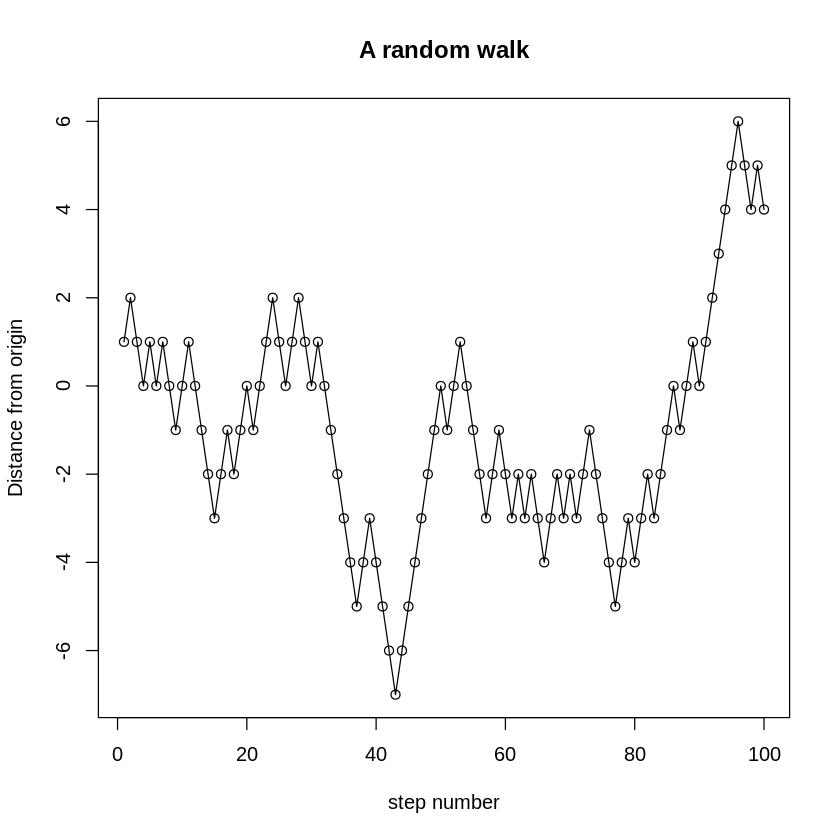

In [30]:
set.seed(7652)
plot_random_walk(100)

Vectorization of functions
===========
The simple function `square()` defined above happens to work with vector arguments without any modification, because the returned statement `x^2` is valid for both numbers and vectors.

In [31]:
square <- function(x) x^2
square(c(1,2,3,4,5))

[1]  1  4  9 16 25

However, functions are not always applicable with vector arguments as they are. For example:

In [32]:
addupto <- function(n) sum(1:n)
addupto(10)

[1] 55

When we call this function with a vector argument, only the first element is taken, and a warning message is issued

In [33]:
addupto(c(10,20)) # sum(1:c(10,20))

Warning message in 1:n:
“numerical expression has 2 elements: only the first used”

[1] 55

If you want this function to work with vector input, the preferred way in R is to use the built-in `sapply` function, which maps a function on each element of a vector. 

In [36]:
sapply(c(10,20, 30, 40, 50), addupto)
c(addupto(10), addupto(20), addupto(30), addupto(40), addupto(50))

[1]   55  210  465  820 1275

[1]   55  210  465  820 1275

Default arguments
==============
When you define a function, you can set some of the arguments to default values. Then you don't have to specify them at each call.

In [37]:
f <- function(capital, interest_rate=0.1) {
    capital * (1+interest_rate)
}

Without specifying the `interest_rate` value, 0.1 is assumed.

In [38]:
f(1000)

[1] 1100

But if you want to change it, you can provide it as an extra argument.

In [41]:
f(1000, 0.2)

[1] 1200

In [39]:
f(capital = 1000, interest_rate = 0.2)

[1] 1200

You can also change the order of the arguments when you use parameter names.

In [40]:
f(interest_rate=0.2, capital=1000)

[1] 1200

Scope of variables
============

* The value of a variable defined outside a function (a *global variable*) can be seen inside a function. 
* However, a variable defined inside a function block is not recognized outside of it.
* We say that the *scope* of the variable `b` is limited to the function `f()`.

In [42]:
a <- 5 # a global variable

f <- function(){
    b <- 10 # a local variable
    cat("inside f(): a =",a,"b =",b,"\n")
}

f()
cat("outside f(): a =",a," ")
cat("b =",b)

inside f(): a = 5 b = 10 
outside f(): a = 5  

ERROR: Error in cat("b =", b): object 'b' not found


A local variable temporarily overrides a global variable with the same name.

In [43]:
a <- 5 # a global variable
cat("before f(): a =",a,"\n")

f <- function(){
    a <- 10 # a local variable
    cat("inside f(): a =",a,"\n")
}

f()
cat("after f(): a =",a)

before f(): a = 5 
inside f(): a = 10 
after f(): a = 5

Assigning values to upper-level variables
==========
Although the values of variables defined in upper levels are available in lower levels, they cannot be modified in a lower level, because an attempt in assignment will create only a local variable with the same name.

Using the _superassignment operator_ `<<-` it is possible to assign to a variable in the higher level.

In [44]:
a <- 5
cat("before f(): a =",a,"\n")

f <- function(){
    a <<- 10
    cat("inside f(): a =",a,"\n")
}

f()
cat("after f(): a =",a)

before f(): a = 5 
inside f(): a = 10 
after f(): a = 10

However, this is **not recommended** in general. You **almost never** need this.

To modify a global variable, the most transparent way is to assign the function output to it explicitly.

In [45]:
a <- 5
cat("before f(): a =",a,"\n")

f <- function(x) {x+5}
a <- f(a)
cat("after f(): a =",a)

before f(): a = 5 
after f(): a = 10

# Unspecified arguments with `...`

Some functions take an unlimited number of arguments, e.g. `c()`.

In [50]:
c(1,2,3)
c(4,2,6,1,3,5,1)

[1] 1 2 3

[1] 4 2 6 1 3 5 1

The `c()` function is defined with an _ellipsis_ (three dots) as the argument list.

In [51]:
help(c)

Ellipsis has two use cases:
* Write a function with any number of arguments (like `c()` or `sum()`).
* Pass some arguments to another function, called inside the current function

In [52]:
plot_random_walk <- function(n, ...){
    x <- cumsum(sample(c(-1,1), n, replace=TRUE))
    plot(x, type="o", ...)
} 

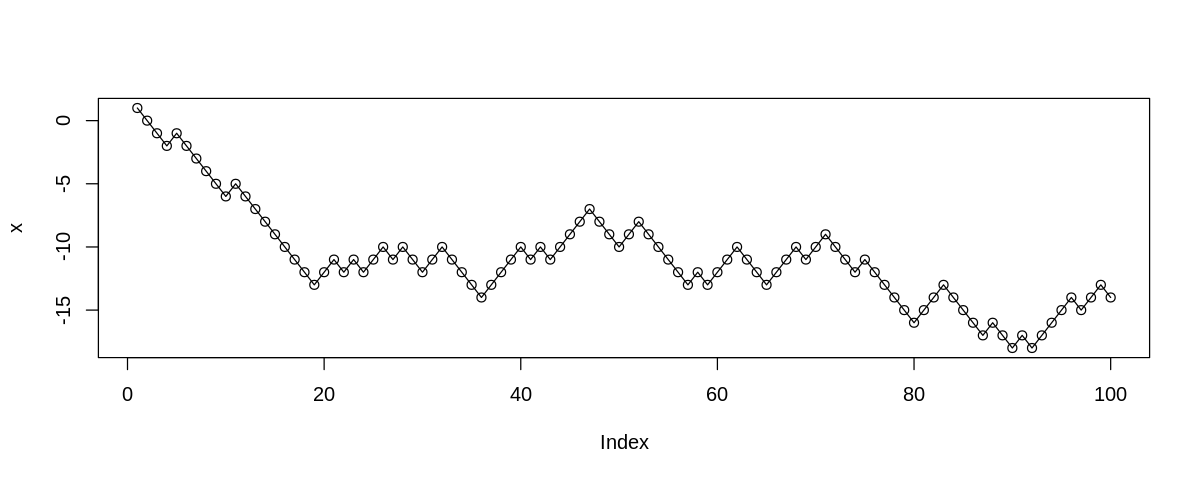

In [53]:
options(repr.plot.width=10, repr.plot.height=4)
plot_random_walk(100)

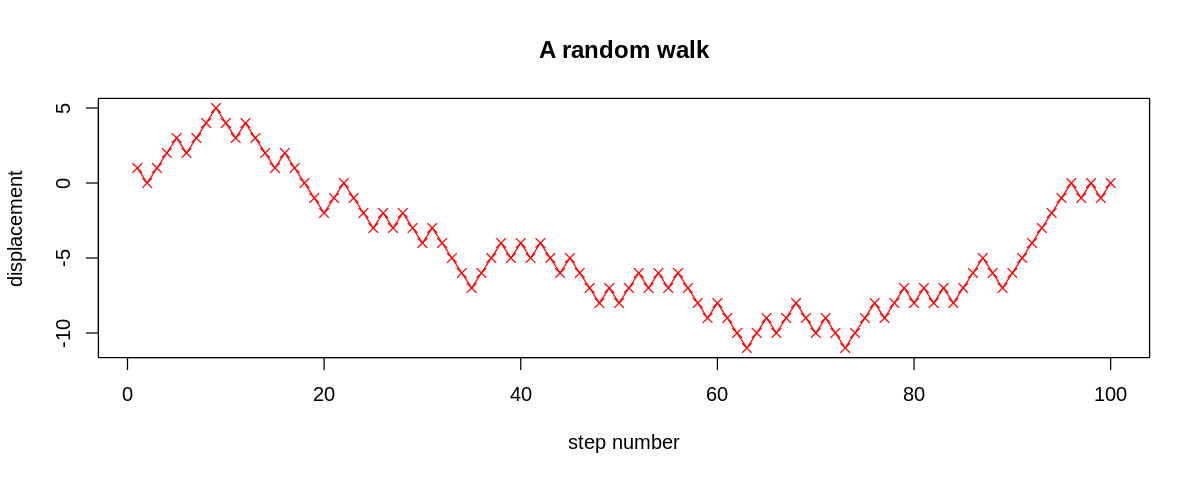

In [54]:
plot_random_walk(100, 
                 pch=4, 
                 col="red", 
                 main="A random walk", 
                 xlab="step number", 
                 ylab="displacement")

The ellipsis can be converted to a vector for processing inside the function.

In [55]:
diff <- function(...) {
    # returns the difference between the first and the last argument
    arguments <- c(...)
    cat("Number of arguments = ",length(arguments))
    arguments[length(arguments)] - arguments[1] # last argument minus first argument
}

In [56]:
diff(1,4,2)
diff(1,4,2,6,3,1)

Number of arguments =  3

[1] 1

Number of arguments =  6

[1] 0

Ellipsis arguments can have arbitrary names, and can be converted to a _list_ object (more on lists later).

In [61]:
f <- function(...){
    args <- list(...)
    print(args)
}

In [62]:
f(a=1, b=3, foo=7654)

$a
[1] 1

$b
[1] 3

$foo
[1] 7654



## Exercises

Write a function with the name `FtoC` that takes a temperature measurement in degrees Fahrenheit, and returns the equivalent value in degrees Celsius. Make sure that your function works with vector input, too.

----------

Write a function with the name `bmi` that takes two arguments, `height` and `weight`, and returns the body-mass index calculated with these argument values. The function should work with vector input, too.

---------

Write a function named `range` that takes a vector of numbers, and returns the difference between its minimum and the maximum elements. Test your function with some randomly-generated vectors.

-----------